In [1]:
%matplotlib inline
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf
import sys
#sys.path.append(directory+":\\Chris\\code\\DDM\\")
import tiff_file
import ddm_clean as ddm

import io 
import sys
import csv
import os
import glob #glob is helpful for searching for filenames or directories
import pickle #for saving data

Z:\Gregor L\__Kai Colloids\SIA\Code\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
Z:\Gregor L\__Kai Colloids\SIA\Code\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
Z:\Gregor L\__Kai Colloids\SIA\Code\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


## Image autocorrelation function defined below

In [2]:
def im_corr(image, filter=False, filtersize=80):
    '''
    Computes image autocorrelation. 
    Takes as input:
        image: 2D image
        filter: Boolean, if true will filter image with uniform filter
        filtersize: size for uniform filtering
        
    Returns:
        corr_im: the image autocorrelation (this will be same size as image)
        rav_corr: radially averaged image autocorrelation
    '''
    
    if filter:
        image = image*1.0 - uf(image,filtersize)
    image = 1.0*image-image.mean() #subtract mean
    image = image/image.std() #normalize by standard deviation
    corr_im = abs(fftshift(ifft2(fft2(image)*np.conj(fft2(image)))))/(image.shape[0]*image.shape[1])
    
    #radial average taken
    rav_corr = ddm.newRadav(corr_im)
    
    
    return corr_im, rav_corr

def filtimage(image, filtersize=80):
    image = image*1.0 - uf(image,filtersize)
    return image

def last_3chars(x):
    return((x.split('\\')[-1])[-7:-4])
#last_3chars(files[0])

In [3]:
###################################################################################
# Specify where the data is and file name for image (or image sequence)           #
###################################################################################

directory = "Z"
exp = "8-19-21 kai beads"
data_dir = directory+":\\Gregor L\\__Kai Colloids\\"+exp+"\\raw tiffs\\"
plot_saveto= directory+":\\\\Gregor L\\__Kai Colloids\\SIA\\Data\\"+exp
kaiC = "AE"

files = glob.glob(data_dir+"*"+kaiC+"*"+"*.tif")
files = sorted(files, key = last_3chars)
print("found %i files" % len(files))
for i,f in enumerate(files): print (' %i \t %s' % (i, f.split('\\')[-1]))

found 24 files
 0 	 AE_2-42_004.tif
 1 	 AE_2-42_005.tif
 2 	 AE_2-42_006.tif
 3 	 AE_5-14_013.tif
 4 	 AE_5-14_014.tif
 5 	 AE_5-14_015.tif
 6 	 AE_8-22_023.tif
 7 	 AE_8-22_024.tif
 8 	 AE_8-22_025.tif
 9 	 AE_1-52_033.tif
 10 	 AE_1-52_034.tif
 11 	 AE_1-52_035.tif
 12 	 AE_8-48_042.tif
 13 	 AE_8-48_043.tif
 14 	 AE_8-48_044.tif
 15 	 AE_10-53_051.tif
 16 	 AE_10-53_052.tif
 17 	 AE_10-53_053.tif
 18 	 AE_2-48_060.tif
 19 	 AE_2-48_061.tif
 20 	 AE_2-48_062.tif
 21 	 AE_days later_3-08_104.tif
 22 	 AE_days later_3-08_105.tif
 23 	 AE_days later_3-08_106.tif


In [4]:
found_file_number = 0
full_filename = files[found_file_number]
data_file = (full_filename.split('\\')[-1])[:-4] #[30:-38]
print(data_file)
print(full_filename)

im_array1 = [0.0] * len(files)
im_array2 = [0.0] * len(files)
im_array3= [0.0] * len(files)
corr_im_array1 = [0.0] * len(files)
corr_im_array2 = [0.0] * len(files)
corr_im_array3 = [0.0] * len(files)
corr_rad_array1 = [0.0] * len(files)
corr_rad_array2 = [0.0] * len(files)
corr_rad_array3 = [0.0] * len(files)
#print(im_array)

area1_files = files[0::3]
area2_files = files[1::3]
area3_files = files[2::3]
area_files_length = int(len(files)/3) 
#print(area3_files)
print(area_files_length)
#print(corr_rad_even)



AE_2-42_004
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\AE_2-42_004.tif
8


In [5]:
results_dict = {'area 1' : [],
                'area 2' : [],
                'area 3' : [],}
area1_dict = {}
area2_dict = {}
area3_dict = {}

In [6]:
#Load one frame from all area 1 files
#The 'key' parameter (defined by "frame_num") specifies which frame to load
frame_num = [0]
for i in range(area_files_length): #len(files)):
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    im_array1[i] = tiff_file.imread(data_dir+data_file+".tif",key=frame_num)
    im_array2[i] = tiff_file.imread(data_dir+data_file+".tif",key=1000)
    im_array3[i] = tiff_file.imread(data_dir+data_file+".tif",key=2000)

Shape of ims is 256,256


<IPython.core.display.Javascript object>


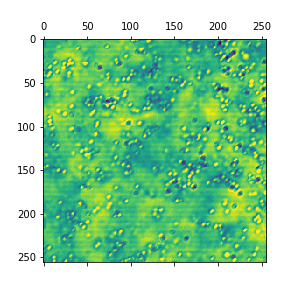

<IPython.core.display.Javascript object>


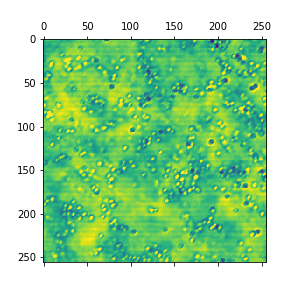

<IPython.core.display.Javascript object>


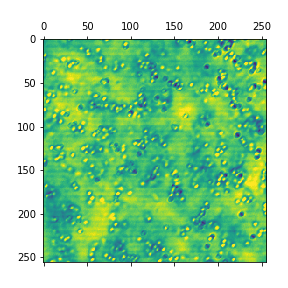

In [11]:
#preview the given frame of a selected area 1 file (defined by "select_file_num")
select_file_num = 7
print("Shape of ims is %i,%i" % im_array1[select_file_num].shape)
plt.matshow(im_array1[select_file_num])
plt.matshow(im_array2[select_file_num])
plt.matshow(im_array3[select_file_num])

In [12]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Reds')

fig, ax = plt.subplots(figsize=(10,10/1.618))

ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10

for i in range(area_files_length):    
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array1[i], corr_rad_array1[i] = im_corr(im_array1[i],filter=False,filtersize=50)
    corr_im_array2[i], corr_rad_array2[i] = im_corr(im_array2[i],filter=False,filtersize=50)
    corr_im_array3[i], corr_rad_array3[i] = im_corr(im_array3[i],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array1[0]))*0.196 
    plt.semilogx(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.semilogy(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.loglog(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    area1_dict['x values'] = xvalues
    area1_dict[data_file] = gf1d(corr_rad_array[i],1)

results_dict['area 1'] = area1_dict
    
plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+kaiC+" --area 1")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

<IPython.core.display.Javascript object>

NameError: name 'corr_rad_array' is not defined

In [119]:
fig.savefig(plot_saveto+"//"+kaiC+"_area1_autocorrelation_frame"+str(frame_num)+".png",dpi=600)
np.savetxt(plot_saveto+"//"+kaiC+"_area1_autocorrelation_frame"+str(frame_num)+'.csv', 
           np.c_[xvalues, gf1d(corr_rad_array[0],1),gf1d(corr_rad_array[1],1),gf1d(corr_rad_array[2],1),gf1d(corr_rad_array[3],1),gf1d(corr_rad_array[4],1),gf1d(corr_rad_array[5],1),gf1d(corr_rad_array[6],1),gf1d(corr_rad_array[7],1)], delimiter=',')

In [121]:
#Load one frame from all area 2 files
#The 'key' parameter (defined by "frame_num") specifies which frame to load
frame_num = [0]
for i in range(area_files_length): #len(files)):
    full_filename = area2_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    im_array[i+area_files_length] = tiff_file.imread(data_dir+data_file+".tif",key=frame_num)

Shape of ims is 256,256


<IPython.core.display.Javascript object>


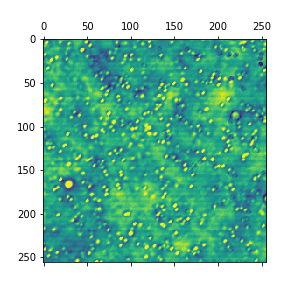

In [122]:
#preview the given frame of a selected area 2 file (defined by "select_file_num")
select_file_num = 14
print("Shape of ims is %i,%i" % im_array[select_file_num].shape)
plt.matshow(im_array[select_file_num])

<IPython.core.display.Javascript object>


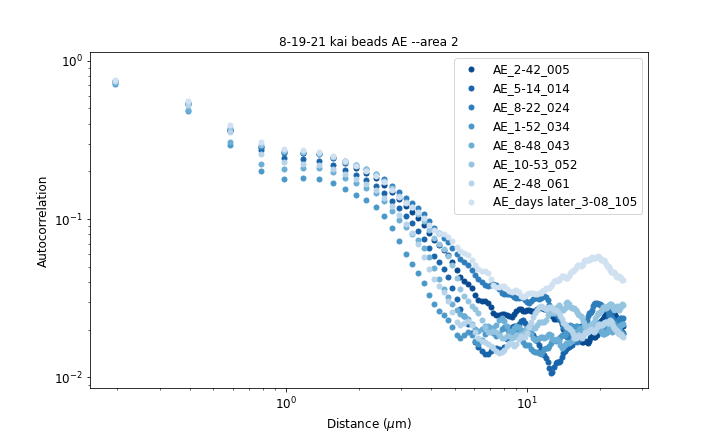

Text(0.5, 1.0, '8-19-21 kai beads AE --area 2')

In [127]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Blues')

fig, ax = plt.subplots(figsize=(10,10/1.618))
ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10

for i in range(area_files_length):    
    full_filename = area2_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array[i], corr_rad_array[i] = im_corr(im_array[i+area_files_length],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array[0]))*0.196  
    #plt.semilogx(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.semilogy(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.loglog(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    area2_dict['x values'] = xvalues
    area2_dict[data_file] = gf1d(corr_rad_array[i],1)

results_dict['area 2'] = area2_dict

plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+data_file[:-20]+" --area 2")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [91]:
fig.savefig(plot_saveto+"//"+kaiC+"_area2_autocorrelation_frame"+str(frame_num)+".png",dpi=600)
np.savetxt(plot_saveto+"//"+kaiC+"_area2_autocorrelation_frame"+str(frame_num)+'.csv', 
           np.c_[xvalues, gf1d(corr_rad_array[0],1),gf1d(corr_rad_array[1],1),gf1d(corr_rad_array[2],1),gf1d(corr_rad_array[3],1),gf1d(corr_rad_array[4],1),gf1d(corr_rad_array[5],1),gf1d(corr_rad_array[6],1),gf1d(corr_rad_array[7],1)], delimiter=',')

In [128]:
#Load one frame from all area 3 files
#The 'key' parameter (defined by "frame_num") specifies which frame to load
frame_num = [0]
for i in range(area_files_length): #len(files)):
    full_filename = area3_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    im_array[i+(area_files_length*2)] = tiff_file.imread(data_dir+data_file+".tif",key=frame_num)


Shape of ims is 256,256


<IPython.core.display.Javascript object>


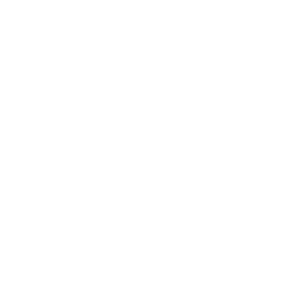

In [129]:
#preview the given frame of a selected area 3 file (defined by "select_file_num")
select_file_num = 16
print("Shape of ims is %i,%i" % im_array[select_file_num].shape)
plt.matshow(im_array[select_file_num])

<IPython.core.display.Javascript object>


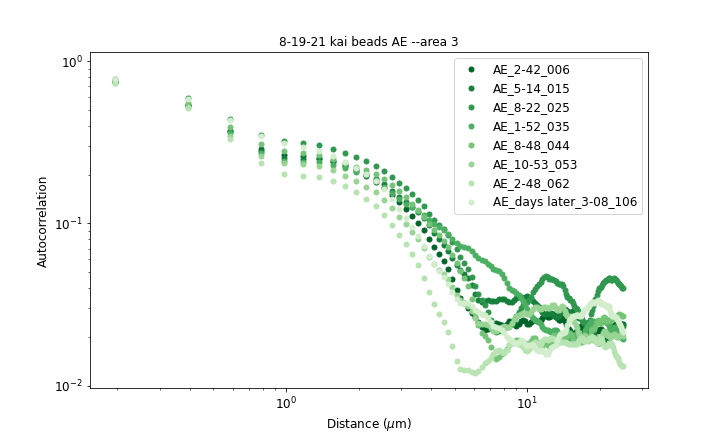

Text(0.5, 1.0, '8-19-21 kai beads AE --area 3')

In [132]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Greens')

fig, ax = plt.subplots(figsize=(10,10/1.618))
ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10

for i in range(area_files_length):    
    full_filename = area3_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array[i], corr_rad_array[i] = im_corr(im_array[i+(area_files_length*2)],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array[0]))*0.196 
    plt.semilogx(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.semilogy(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.loglog(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    area3_dict['x values'] = xvalues
    area3_dict[data_file] = gf1d(corr_rad_array[i],1)

results_dict['area 3'] = area3_dict

plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+kaiC+" --area 3")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [95]:
fig.savefig(plot_saveto+"//"+kaiC+"_area3_autocorrelation_frame"+str(frame_num)+".png",dpi=600)
np.savetxt(plot_saveto+"//"+kaiC+"_area3_autocorrelation_frame"+str(frame_num)+'.csv', 
           np.c_[xvalues, gf1d(corr_rad_array[0],1),gf1d(corr_rad_array[1],1),gf1d(corr_rad_array[2],1),gf1d(corr_rad_array[3],1),gf1d(corr_rad_array[4],1),gf1d(corr_rad_array[5],1),gf1d(corr_rad_array[6],1),gf1d(corr_rad_array[7],1)], delimiter=',')

In [96]:
file_to_write = open(plot_saveto+"//"+kaiC + "_SIA_results.p", "wb")
pickle.dump(results_dict, file_to_write)

In [75]:
#pickle.load(open(plot_saveto+"//"+kaiC + "_SIA_results.p",'rb')) 